<a href="https://colab.research.google.com/github/TomAmster/Data-Science/blob/master/EDA_Explaratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [0]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

# **Explaratory Data Analysis**

## Loading the datasets


In [0]:
drive_dir = '/content/drive/Shared drives/DS Workshop/data/'
train_path = drive_dir + 'train.csv'
train = pd.read_csv(train_path)
bids_path = drive_dir + 'bids.csv/bids.csv'
bids = pd.read_csv(bids_path)
test_path = drive_dir + 'test.csv'
test = pd.read_csv(test_path)

### Merging Datasets- Train & Test with the Bids

In [0]:
# bidders_df = pd.concat([train, test])
# merged_bids = pd.merge(bidders_df, bids, on='bidder_id', how='left')

# train_bids = pd.merge(train, bids, on='bidder_id', how='left')
# merged_bids.head(10)

## General Dataset Information

In [0]:
# print(f"total row in bid:          {len(merged_bids)}")
# print(f"total bids in bid:         {len(merged_bids['bid_id'].unique())}")
# print(f"total bidder in bids:      {len(merged_bids['bidder_id'].unique())}")
# print(f"total payment in bids:     {len(merged_bids['payment_account'].unique())}")
# print(f"total address in bids:     {len(merged_bids['address'].unique())}")
# print(f"total auction in bids:     {len(merged_bids['auction'].unique())}")
# print(f"total merchandise in bids: {len(merged_bids['merchandise'].unique())}")
# print(f"total device in bids:      {len(merged_bids['device'].unique())}")
# print(f"total country in bids:     {len(merged_bids['country'].unique())}")
# print(f"total ip in bids:          {len(merged_bids['ip'].unique())}")
# print(f"total url in bids:         {len(merged_bids['url'].unique())}")

In [0]:
# print(
#     f"total bids made by robots in data set: {len(bid[bid['outcome'] == 1])}")
# print(
#     f"total bids made by human in data set:  {len(bid[bid['outcome'] == 0])}")

## Statistics Analysis - 
Checking Difference in pararmeters between robots and humans

### Creating Count Statistics for the pararmeters

In [0]:
bids_count = bids.groupby("bidder_id")["bid_id","device","country","ip","merchandise","auction","url"].nunique()
bids_count.reset_index(inplace=True)
bids_count = bids_count.add_prefix("count_")
bids_count.rename(columns={"count_bidder_id":"bidder_id"},inplace=True)
train_counts = pd.merge(train,bids_count,on="bidder_id",how="left")

In [0]:
train_counts.head()

,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0


### Creating Count Statistics Per Parameter Per Auction

In [0]:
train_counts['average_bids_per_auction'] = train_counts.apply(lambda row:row['count_bid_id']/row['count_auction'] if row['count_auction']>0 else 0, axis=1) 
train_counts['average_bids_per_url'] = train_counts.apply(lambda row:row['count_bid_id']/row['count_url'] if row['count_url']>0 else 0, axis=1) 
train_counts['average_bids_per_device'] = train_counts.apply(lambda row:row['count_bid_id']/row['count_device'] if row['count_device']>0 else 0, axis=1) 
train_counts['average_bids_per_country'] = train_counts.apply(lambda row:row['count_bid_id']/row['count_country'] if row['count_country']>0 else 0, axis=1) 

In [0]:
train_counts.head()

,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,average_bids_per_auction,average_bids_per_url,average_bids_per_device,average_bids_per_country
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0,1.333333,24.000000,1.714286,4.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,3.000000,1.500000,1.500000,3.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0,1.000000,2.000000,2.000000,4.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0,6.739130,1.703297,2.924528,77.5


In [0]:
human_data = train_counts[train_counts['outcome'] == 0]
robot_data = train_counts[train_counts['outcome'] == 1]

In [0]:
print(f"average bids per robot: %.0f" % robot_data.count_bid_id.mean() )
print(f"average bids per human:  %.0f" % human_data.count_bid_id.mean())
print(f"average bids per auction by robot: %.0f" % robot_data.average_bids_per_auction.mean())
print(f"average bids per auction by human:  %.0f" % human_data.average_bids_per_auction.mean())
print(f"average number of devices by robot: %.0f" % robot_data.count_device.mean())
print(f"average number of devices by human:  %.0f" % human_data.count_device.mean())
print(f"average number of IPs by robot: %.0f" % robot_data.count_ip.mean())
print(f"average number of IPs by human:  %.0f" % human_data.count_ip.mean())
print(f"average number of URLs by robot: %.0f" % robot_data.count_url.mean())
print(f"average number of URLs by human:  %.0f" % human_data.count_url.mean())

average bids per robot: 4004
average bids per human:  1414
average bids per auction by robot: 23
average bids per auction by human:  6
average number of devices by robot: 164
average number of devices by human:  74
average number of IPs by robot: 2388
average number of IPs by human:  581
average number of URLs by robot: 545
average number of URLs by human:  335


# Trying to separate Bots from Humans

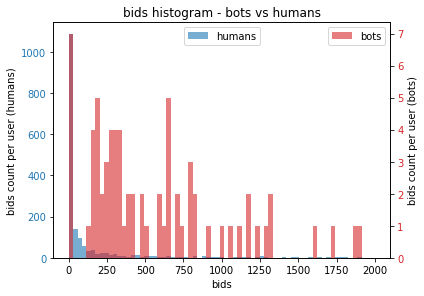

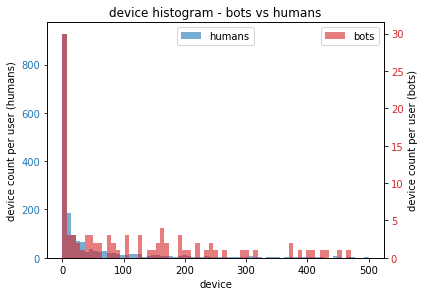

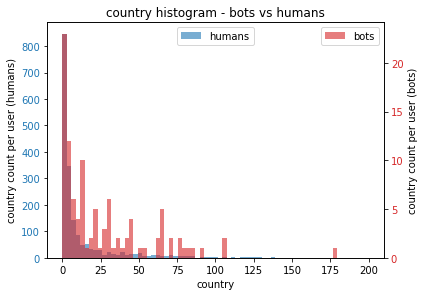

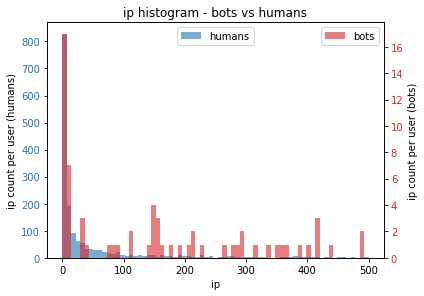

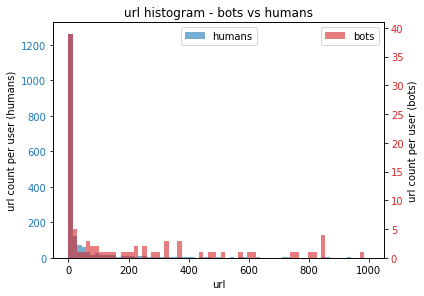

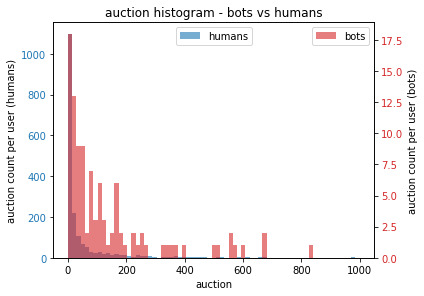

In [0]:
def plot_hist(column_name,lowest_bin,highest_bin,no_bins,name,joined):
  fig, ax1 = plt.subplots()
  bins = np.linspace(lowest_bin,highest_bin,no_bins)
  color = 'tab:blue'
  col_name = name

  ax1.hist(joined[joined['outcome'] == 0 ][column_name],bins,color=color,alpha=0.6,label='humans')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.legend(loc='upper center')
  ax1.set_ylabel(col_name+' count per user (humans)')
  ax1.set_xlabel(col_name)

  ax2 = ax1.twinx() 
  color = 'tab:red'
  ax2.hist(joined[joined['outcome'] == 1 ][column_name],bins,color=color,alpha=0.6,label='bots')
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.legend(loc='upper right')
  ax2.set_ylabel(col_name +' count per user (bots)')

  fig.tight_layout()
  plt.title(col_name + ' histogram - bots vs humans')
  plt.xlabel('bid count per user')

  plt.show()

plot_hist('count_bid_id',0,2000,70,'bids',train_counts)
plot_hist('count_device',0,500,70,'device',train_counts)
plot_hist('count_country',0,200,70,'country',train_counts)
plot_hist('count_ip',0,500,70,'ip',train_counts)
plot_hist('count_url',0,1000,70,'url',train_counts)
plot_hist('count_auction',0,1000,70,'auction',train_counts)

from the above we can conclude **that the average bot uses a lot more bids, ip's and devices** and participates in **many more auctions** than the average human.
we will now try to see if ther is a specific value that correlates with bots :


we will now specify on bids that came only from train bidders (around 3M out of 7M ) because we want to see if there is a difference between bots / humans - we need the labels

In [0]:

#this line takes only bids that belong to train - thus we add the labels to the bids
train_bids = pd.merge(train, bids, on='bidder_id', how='left')

bots = train_bids[train_bids['outcome'] == 1]
humans = train_bids[train_bids['outcome'] == 0]

bots_country = bots.groupby('country').count()
bots_country = bots_country.drop(columns=['payment_account','address','outcome','time','bid_id','auction','merchandise','device','ip','url'])
bots_country =bots_country.rename(columns={'bidder_id': 'bots'})
bots_country = bots_country.sort_values(by=['bots'], ascending=False)
bots_sum = bots_country['bots'].sum()
bots_country['bots_per'] = bots_country['bots'].div(bots_sum)
bots_country['bots_per'] = bots_country['bots_per'].multiply(100)

# bots_country = bots_country.drop(columns=['bots'])

human_country = humans.groupby('country').count()
human_country = human_country.drop(columns=['payment_account','address','outcome','time','bid_id','auction','merchandise','device','ip','url'])
human_country =human_country.rename(columns={'bidder_id': 'humans'})
human_country = human_country.sort_values(by=['humans'], ascending=False)
human_sum = human_country['humans'].sum()
human_country['human_per'] = human_country['humans'].div(human_sum)
human_country['human_per'] = human_country['human_per'].multiply(100)
# human_country = human_country.drop(columns=['humans'])

#for each country we want the percentage of bots / humans
country_perc = bots_country.join(human_country, on='country')
country_perc.head(10)
country_perc.reset_index(inplace=True)


country_perc.head(10)


,country,bots,bots_per,humans,human_per
0,in,86386,20.959692,559245.0,21.052978
1,us,66663,16.174333,73380.0,2.762416
2,id,20495,4.972668,153733.0,5.787334
3,de,18530,4.495903,10436.0,0.392867
4,th,17282,4.193103,67432.0,2.538502
5,za,13364,3.242485,141974.0,5.344662
6,ru,11100,2.693175,42774.0,1.610243
7,mx,10848,2.632032,46438.0,1.748175
8,my,10488,2.544686,77319.0,2.910701
9,ca,9205,2.233394,7804.0,0.293784


(97, 100)

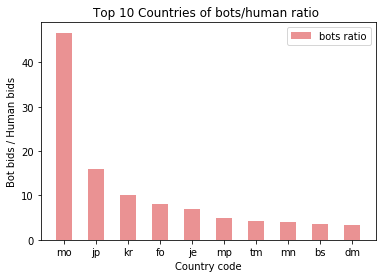

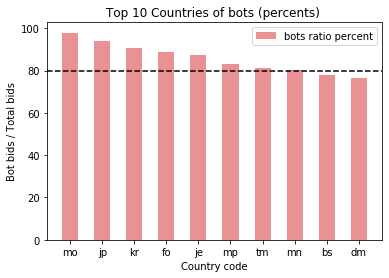

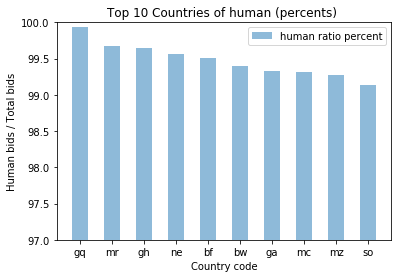

In [0]:
top = 10
country_perc['bots_ratio'] = country_perc['bots'] / country_perc['humans']
country_perc.head(10)

gr = country_perc.nlargest(top, 'bots_ratio')
width = 0.5
ind = [i for i in range(top)]
plt.figure()
plt.bar(ind,gr['bots_ratio'], width,label='bots ratio',color = 'tab:red',alpha=0.5)
plt.xticks(ind,gr['country'])
plt.title('Top ' + str(top) + ' Countries of bots/human ratio ')
plt.ylabel('Bot bids / Human bids')
plt.xlabel('Country code')
plt.legend()


country_perc['sum'] = country_perc['humans'] + country_perc['bots']
country_perc['bots_ratio_per'] = country_perc['bots'] / country_perc['sum']
country_perc['bots_ratio_per'] = country_perc['bots_ratio_per'].multiply(100)


gr = country_perc.nlargest(top, 'bots_ratio_per')
width = 0.5
ind = [i for i in range(top)]
plt.figure()
plt.bar(ind,gr['bots_ratio_per'], width,label='bots ratio percent',color = 'tab:red',alpha=0.5)
plt.xticks(ind,gr['country'])
plt.title('Top ' + str(top) + ' Countries of bots (percents) ')
plt.ylabel('Bot bids / Total bids')
plt.xlabel('Country code')
plt.legend()
# plt.ylim([75,100])
plt.axhline(y=80,linestyle='--',color='k')

country_perc['human_ratio_per'] = country_perc['humans'] / country_perc['sum']
country_perc['human_ratio_per'] = country_perc['human_ratio_per'].multiply(100)


gr = country_perc.nlargest(top, 'human_ratio_per')
width = 0.5
ind = [i for i in range(top)]
plt.figure()
plt.bar(ind,gr['human_ratio_per'], width,label='human ratio percent',color = 'tab:blue',alpha=0.5)
plt.xticks(ind,gr['country'])
plt.title('Top ' + str(top) + ' Countries of human (percents) ')
plt.ylabel('Human bids / Total bids')
plt.xlabel('Country code')
plt.legend()
plt.ylim([97,100])